In [1]:
import os
import zipfile
import gdown
import numpy
import torch
import matplotlib.pyplot as plt

In [2]:
# Set your target directory
target_dir = "/run/media/amir/1DA18C76F50D67DF/school/term-6/Deep - Learning[andrew ng ]/homeworks/Deep_Learning/homework3_coding/TemplateRequirements/Template&Requirements"
os.makedirs(target_dir, exist_ok=True)

In [3]:
file_id = "1f5FYQWZUKVSrroAz1_RkW2DrfHKj-tAZ"
output_zip = os.path.join(target_dir, "downloaded_file.zip")

In [4]:
gdown.download(f"https://drive.google.com/uc?id={file_id}", output_zip, quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=1f5FYQWZUKVSrroAz1_RkW2DrfHKj-tAZ
From (redirected): https://drive.google.com/uc?id=1f5FYQWZUKVSrroAz1_RkW2DrfHKj-tAZ&confirm=t&uuid=7cf4a9e0-dd9f-4378-a005-d31dfc99905f
To: /run/media/amir/1DA18C76F50D67DF/school/term-6/Deep - Learning[andrew ng ]/homeworks/Deep_Learning/homework3_coding/TemplateRequirements/Template&Requirements/downloaded_file.zip
100%|██████████| 124M/124M [01:16<00:00, 1.62MB/s] 


'/run/media/amir/1DA18C76F50D67DF/school/term-6/Deep - Learning[andrew ng ]/homeworks/Deep_Learning/homework3_coding/TemplateRequirements/Template&Requirements/downloaded_file.zip'

In [5]:
with zipfile.ZipFile(output_zip, 'r') as zip_ref:
    zip_ref.extractall(target_dir)
os.remove(output_zip)

In [6]:
print(f"File downloaded and extracted successfully in {target_dir}!")

File downloaded and extracted successfully in /run/media/amir/1DA18C76F50D67DF/school/term-6/Deep - Learning[andrew ng ]/homeworks/Deep_Learning/homework3_coding/TemplateRequirements/Template&Requirements!


In [7]:
train_folder = "/run/media/amir/1DA18C76F50D67DF/school/term-6/Deep - Learning[andrew ng ]/homeworks/Deep_Learning/homework3_coding/TemplateRequirements/Template&Requirements/Data/train"
valid_folder = "/run/media/amir/1DA18C76F50D67DF/school/term-6/Deep - Learning[andrew ng ]/homeworks/Deep_Learning/homework3_coding/TemplateRequirements/Template&Requirements/Data/valid"
test_folder = "/run/media/amir/1DA18C76F50D67DF/school/term-6/Deep - Learning[andrew ng ]/homeworks/Deep_Learning/homework3_coding/TemplateRequirements/Template&Requirements/Data/test"

In [8]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

In [9]:
input_shape = (224, 224, 3)
num_classes = 4

test_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

test_dataset = datasets.ImageFolder(
    root=test_folder,
    transform=test_transforms
)

test_loader = DataLoader(
    test_dataset,
    batch_size=64,
    shuffle=False,  
    num_workers=2   
)

for images, labels in test_loader:
    print(images.shape, labels.shape)
    break

torch.Size([64, 3, 224, 224]) torch.Size([64])


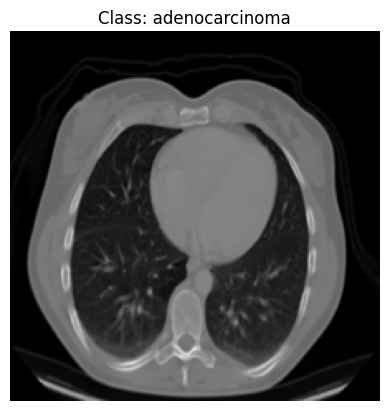

In [10]:
class_names = test_dataset.classes

images, labels = next(iter(test_loader))

img = images[0]
label = labels[0].item()

img_np = img.numpy().transpose(1, 2, 0)


plt.imshow(img_np)
plt.title(f"Class: {class_names[label]}")
plt.axis('off')
plt.show()

In [11]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from sklearn.model_selection import train_test_split
from PIL import Image
from torch.utils.data import Dataset
from torchvision import transforms

In [ ]:
train_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),  # Data augmentation
    transforms.ToTensor(),
])

valid_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

train_dataset = datasets.ImageFolder(
    root=train_folder,
    transform=train_transforms
)

valid_dataset = datasets.ImageFolder(
    root=valid_folder,
    transform=valid_transforms
)

train_loader = DataLoader(
    train_dataset,
    batch_size=64,
    shuffle=True,   # Shuffle for training
    num_workers=2
)

valid_loader = DataLoader(
    valid_dataset,
    batch_size=64,
    shuffle=False,  # No shuffle for validation
    num_workers=2
)

In [ ]:
import torch.nn as nn
import torch.optim as optim

class SimpleCNN(nn.Module):
    def __init__(self, num_classes=4):
        super(SimpleCNN, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1),  # (B, 3, 224, 224) -> (B, 32, 224, 224)
            nn.ReLU(),
            nn.MaxPool2d(2, 2),                         # (B, 32, 112, 112)
            nn.Conv2d(32, 64, kernel_size=3, padding=1), # (B, 64, 112, 112)
            nn.ReLU(),
            nn.MaxPool2d(2, 2),                         # (B, 64, 56, 56)
            nn.Conv2d(64, 128, kernel_size=3, padding=1),# (B, 128, 56, 56)
            nn.ReLU(),
            nn.MaxPool2d(2, 2),                         # (B, 128, 28, 28)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(128 * 28 * 28, 256),
            nn.ReLU(),
            nn.Linear(256, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = self.classifier(x)
        return x

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = SimpleCNN(num_classes=num_classes).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)

def train_one_epoch(model, loader, optimizer, criterion, device):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    for images, labels in loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * images.size(0)
        _, predicted = outputs.max(1)
        correct += predicted.eq(labels).sum().item()
        total += labels.size(0)
    return running_loss / total, correct / total

def evaluate(model, loader, criterion, device):
    model.eval()
    running_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            running_loss += loss.item() * images.size(0)
            _, predicted = outputs.max(1)
            correct += predicted.eq(labels).sum().item()
            total += labels.size(0)
    return running_loss / total, correct / total


In [14]:
print("Train class_to_idx:", train_dataset.class_to_idx)
print("Test class_to_idx:", test_dataset.class_to_idx)

Train class_to_idx: {'adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib': 0, 'large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa': 1, 'normal': 2, 'squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa': 3}
Test class_to_idx: {'adenocarcinoma': 0, 'large.cell.carcinoma': 1, 'normal': 2, 'squamous.cell.carcinoma': 3}


In [15]:
num_epochs = 20
for epoch in range(num_epochs):
    train_loss, train_acc = train_one_epoch(model, train_loader, optimizer, criterion, device)
    val_loss, val_acc = evaluate(model, valid_loader, criterion, device)
    print(f"Epoch {epoch+1}: Train Acc={train_acc:.3f}, Val Acc={val_acc:.3f}")

Epoch 1: Train Acc=0.375, Val Acc=0.472
Epoch 2: Train Acc=0.577, Val Acc=0.458
Epoch 3: Train Acc=0.563, Val Acc=0.458
Epoch 4: Train Acc=0.643, Val Acc=0.486
Epoch 5: Train Acc=0.657, Val Acc=0.542
Epoch 6: Train Acc=0.677, Val Acc=0.625
Epoch 7: Train Acc=0.732, Val Acc=0.514
Epoch 8: Train Acc=0.750, Val Acc=0.583
Epoch 9: Train Acc=0.773, Val Acc=0.556
Epoch 10: Train Acc=0.799, Val Acc=0.653
Epoch 11: Train Acc=0.848, Val Acc=0.639
Epoch 12: Train Acc=0.860, Val Acc=0.597
Epoch 13: Train Acc=0.863, Val Acc=0.681
Epoch 14: Train Acc=0.897, Val Acc=0.653
Epoch 15: Train Acc=0.907, Val Acc=0.681
Epoch 16: Train Acc=0.899, Val Acc=0.653
Epoch 17: Train Acc=0.920, Val Acc=0.639
Epoch 18: Train Acc=0.918, Val Acc=0.653
Epoch 19: Train Acc=0.938, Val Acc=0.639
Epoch 20: Train Acc=0.940, Val Acc=0.639


In [16]:
test_loss, test_acc = evaluate(model, test_loader, criterion, device)
print(f"Test Loss: {test_loss:.3f}, Test Accuracy: {test_acc:.3f}")

Test Loss: 1.711, Test Accuracy: 0.543


In [ ]:
import random
from torchvision import transforms
from PIL import Image, ImageOps

class RandomOneOfTransform:
    def __init__(self, transforms_with_probs):
        self.transforms, self.probs = zip(*transforms_with_probs)
        assert abs(sum(self.probs) - 1.0) < 1e-6, "Probabilities must sum to 1"

    def __call__(self, img):
        t = random.choices(self.transforms, weights=self.probs, k=1)[0]
        return t(img)

augmentations = [
    (transforms.Compose([
        transforms.RandomResizedCrop(224, scale=(0.8, 1.0)),
        transforms.Resize((224, 224))  
    ]), 0.2),
    (transforms.Compose([
        transforms.RandomVerticalFlip(p=1.0),
        transforms.Resize((224, 224))
    ]), 0.2),
    (transforms.Compose([
        transforms.RandomHorizontalFlip(p=1.0),
        transforms.Resize((224, 224))
    ]), 0.2),
    (transforms.Compose([
        transforms.Lambda(lambda img: ImageOps.autocontrast(img)),
        transforms.Resize((224, 224))
    ]), 0.2),
    (transforms.Compose([
        transforms.RandomRotation(30, expand=False, fill=0),
        transforms.Resize((224, 224))  
    ]), 0.2)
]

train_transforms = transforms.Compose([
    RandomOneOfTransform(augmentations),
    transforms.ToTensor(),
])

valid_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

train_dataset = datasets.ImageFolder(
    root=train_folder,
    transform=train_transforms
)
valid_dataset = datasets.ImageFolder(
    root=valid_folder,
    transform=valid_transforms
)
train_loader = DataLoader(
    train_dataset,
    batch_size=64,
    shuffle=True,
    num_workers=2
)
valid_loader = DataLoader(
    valid_dataset,
    batch_size=64,
    shuffle=False,
    num_workers=2
)

In [18]:
mean = [0.485, 0.456, 0.406]
std  = [0.229, 0.224, 0.225]

In [ ]:
train_transforms = transforms.Compose([
    RandomOneOfTransform(augmentations),
    transforms.ToTensor(),
    transforms.Normalize(mean, std),
])
valid_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean, std),
])

train_dataset = datasets.ImageFolder(train_folder, transform=train_transforms)
valid_dataset = datasets.ImageFolder(valid_folder, transform=valid_transforms)
train_loader  = DataLoader(train_dataset, batch_size=64, shuffle=True,  num_workers=4)
valid_loader  = DataLoader(valid_dataset, batch_size=64, shuffle=False, num_workers=4)

model     = SimpleCNN(num_classes=num_classes).to(device)
optimizer = optim.Adam(model.parameters(), lr=1e-4, weight_decay=1e-4)


In [20]:
import matplotlib.pyplot as plt

train_accs, val_accs, train_losses, val_losses = [], [], [], []


for epoch in range(num_epochs):
    train_loss, train_acc = train_one_epoch(model, train_loader, optimizer, criterion, device)
    val_loss,   val_acc   = evaluate(model, valid_loader,   criterion, device)
    train_losses.append(train_loss)
    train_accs.append(train_acc)
    val_losses.append(val_loss)
    val_accs.append(val_acc)
    print(f"[Aug] Epoch {epoch+1}: Train Acc={train_acc:.3f}, Val Acc={val_acc:.3f}")


[Aug] Epoch 1: Train Acc=0.427, Val Acc=0.472
[Aug] Epoch 2: Train Acc=0.543, Val Acc=0.472
[Aug] Epoch 3: Train Acc=0.620, Val Acc=0.472
[Aug] Epoch 4: Train Acc=0.626, Val Acc=0.542
[Aug] Epoch 5: Train Acc=0.659, Val Acc=0.667
[Aug] Epoch 6: Train Acc=0.695, Val Acc=0.486
[Aug] Epoch 7: Train Acc=0.706, Val Acc=0.500
[Aug] Epoch 8: Train Acc=0.724, Val Acc=0.625
[Aug] Epoch 9: Train Acc=0.762, Val Acc=0.611
[Aug] Epoch 10: Train Acc=0.752, Val Acc=0.653
[Aug] Epoch 11: Train Acc=0.729, Val Acc=0.708
[Aug] Epoch 12: Train Acc=0.768, Val Acc=0.694
[Aug] Epoch 13: Train Acc=0.793, Val Acc=0.681
[Aug] Epoch 14: Train Acc=0.816, Val Acc=0.681
[Aug] Epoch 15: Train Acc=0.843, Val Acc=0.722
[Aug] Epoch 16: Train Acc=0.827, Val Acc=0.708
[Aug] Epoch 17: Train Acc=0.821, Val Acc=0.625
[Aug] Epoch 18: Train Acc=0.827, Val Acc=0.694
[Aug] Epoch 19: Train Acc=0.881, Val Acc=0.722
[Aug] Epoch 20: Train Acc=0.878, Val Acc=0.750


In [21]:
test_loss, test_acc = evaluate(model, test_loader, criterion, device)
print(f"Test Loss: {test_loss:.3f}, Test Accuracy: {test_acc:.3f}")

Test Loss: 1.445, Test Accuracy: 0.356


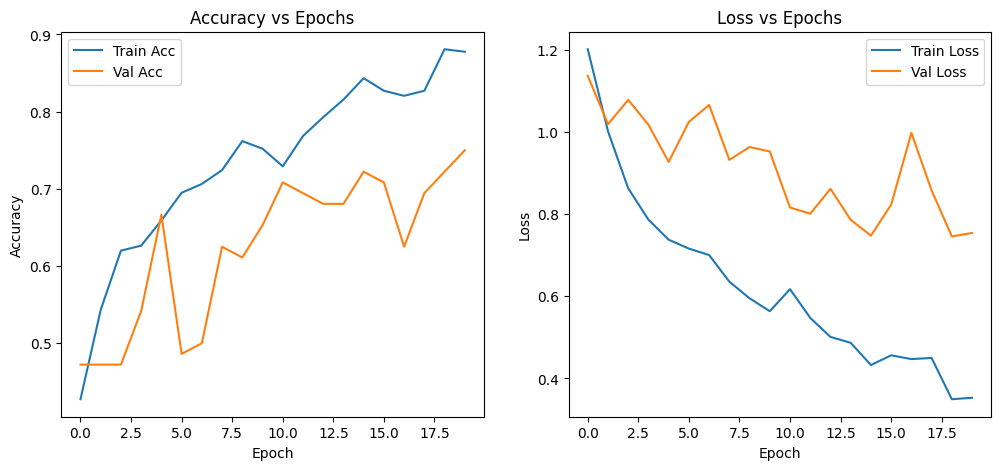

In [22]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(train_accs, label='Train Acc')
plt.plot(val_accs, label='Val Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy vs Epochs')

plt.subplot(1,2,2)
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss vs Epochs')
plt.show()

In [ ]:
class SimpleCNN(nn.Module):
    def __init__(self, num_classes=4):
        super(SimpleCNN, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            nn.Dropout(0.25)  
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(128 * 28 * 28, 256),
            nn.ReLU(),
            nn.Dropout(0.5),  
            nn.Linear(256, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = self.classifier(x)
        return x

In [24]:
optimizer = optim.Adam(model.parameters(), lr=1e-4, weight_decay=1e-4)

Epoch 1: Train Acc=0.808, Val Acc=0.583
Epoch 2: Train Acc=0.856, Val Acc=0.694
Epoch 3: Train Acc=0.887, Val Acc=0.750
Epoch 4: Train Acc=0.861, Val Acc=0.708
Epoch 5: Train Acc=0.855, Val Acc=0.764
Epoch 6: Train Acc=0.889, Val Acc=0.736
Epoch 7: Train Acc=0.884, Val Acc=0.708
Epoch 8: Train Acc=0.902, Val Acc=0.778
Epoch 9: Train Acc=0.904, Val Acc=0.764
Epoch 10: Train Acc=0.899, Val Acc=0.653
Epoch 11: Train Acc=0.874, Val Acc=0.681
Epoch 12: Train Acc=0.881, Val Acc=0.764
Epoch 13: Train Acc=0.917, Val Acc=0.778
Epoch 14: Train Acc=0.905, Val Acc=0.778
Epoch 15: Train Acc=0.900, Val Acc=0.708
Epoch 16: Train Acc=0.899, Val Acc=0.722
Epoch 17: Train Acc=0.923, Val Acc=0.764
Epoch 18: Train Acc=0.915, Val Acc=0.806
Epoch 19: Train Acc=0.922, Val Acc=0.653
Epoch 20: Train Acc=0.912, Val Acc=0.764


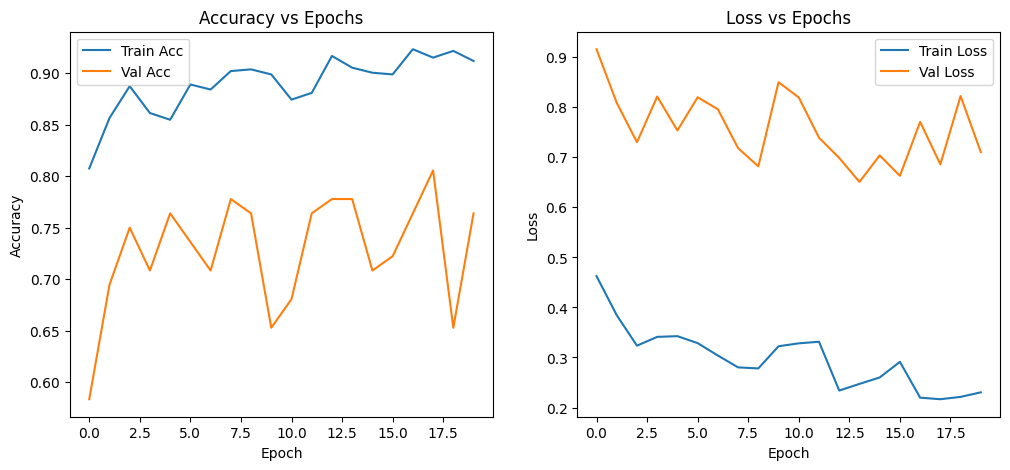

In [25]:
train_accs, val_accs, train_losses, val_losses = [], [], [], []

num_epochs = 20
for epoch in range(num_epochs):
    train_loss, train_acc = train_one_epoch(model, train_loader, optimizer, criterion, device)
    val_loss, val_acc = evaluate(model, valid_loader, criterion, device)
    train_losses.append(train_loss)
    train_accs.append(train_acc)
    val_losses.append(val_loss)
    val_accs.append(val_acc)
    print(f"Epoch {epoch+1}: Train Acc={train_acc:.3f}, Val Acc={val_acc:.3f}")

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(train_accs, label='Train Acc')
plt.plot(val_accs, label='Val Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy vs Epochs')

plt.subplot(1,2,2)
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss vs Epochs')
plt.show()

In [26]:
test_loss, test_acc = evaluate(model, test_loader, criterion, device)
print(f"Test Loss: {test_loss:.3f}, Test Accuracy: {test_acc:.3f}")

Test Loss: 1.676, Test Accuracy: 0.349


In [ ]:
from comet_ml import Experiment

experiment = Experiment(
    api_key="YOUR-API-KEY",
    project_name="deep-learning-homework3", 
    workspace="amir"                
)

experiment.log_parameters({
    "epochs": 20,
    "batch_size": 64,
    "learning_rate": 1e-4,
    "weight_decay": 1e-4,
    "dropout_conv": 0.25,
    "dropout_fc": 0.5,
    "optimizer": "Adam",
    "augmentation": "RandomOneOf(ResizedCrop, VFlip, HFlip, AutoContrast, Rotation)"
})

COMET WARNING: To get all data logged automatically, import comet_ml before the following modules: sklearn, torch.
COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET ERROR: The given API key 'YOUR-API-KEY' is invalid on 'www.comet.com', please check it against the dashboard. Your experiment will not be logged 
For more details, please refer to: https://www.comet.com/docs/v2/api-and-sdk/python-sdk/warnings-errors/


In [28]:
experiment.log_metric("train_loss", train_loss, step=epoch+1)
experiment.log_metric("train_acc", train_acc, step=epoch+1)
experiment.log_metric("val_loss", val_loss, step=epoch+1)
experiment.log_metric("val_acc", val_acc, step=epoch+1)

In [29]:
for epoch in range(20):  
    train_loss, train_acc = train_one_epoch(model, train_loader, optimizer, criterion, device)
    val_loss, val_acc = evaluate(model, valid_loader, criterion, device)
    train_losses.append(train_loss)
    train_accs.append(train_acc)
    val_losses.append(val_loss)
    val_accs.append(val_acc)
    print(f"Epoch {epoch+1}: Train Acc={train_acc:.3f}, Val Acc={val_acc:.3f}")

    
    # Log metrics to comet
    experiment.log_metric("train_loss", train_loss, step=epoch+1)
    experiment.log_metric("train_acc", train_acc, step=epoch+1)
    experiment.log_metric("val_loss", val_loss, step=epoch+1)
    experiment.log_metric("val_acc", val_acc, step=epoch+1)

Epoch 1: Train Acc=0.918, Val Acc=0.722
Epoch 2: Train Acc=0.928, Val Acc=0.736
Epoch 3: Train Acc=0.933, Val Acc=0.722
Epoch 4: Train Acc=0.933, Val Acc=0.736
Epoch 5: Train Acc=0.958, Val Acc=0.708
Epoch 6: Train Acc=0.923, Val Acc=0.694
Epoch 7: Train Acc=0.918, Val Acc=0.694
Epoch 8: Train Acc=0.933, Val Acc=0.708
Epoch 9: Train Acc=0.910, Val Acc=0.722
Epoch 10: Train Acc=0.938, Val Acc=0.736
Epoch 11: Train Acc=0.948, Val Acc=0.806
Epoch 12: Train Acc=0.933, Val Acc=0.750
Epoch 13: Train Acc=0.951, Val Acc=0.778
Epoch 14: Train Acc=0.951, Val Acc=0.750
Epoch 15: Train Acc=0.964, Val Acc=0.750
Epoch 16: Train Acc=0.943, Val Acc=0.750
Epoch 17: Train Acc=0.949, Val Acc=0.708
Epoch 18: Train Acc=0.946, Val Acc=0.708
Epoch 19: Train Acc=0.943, Val Acc=0.750
Epoch 20: Train Acc=0.966, Val Acc=0.806


In [33]:
test_loss, test_acc = evaluate(model, test_loader, criterion, device)
print(f"Test Loss: {test_loss:.3f}, Test Accuracy: {test_acc:.3f}")

Test Loss: 1.510, Test Accuracy: 0.381


In [68]:
import torchvision.models as models
from torchsummary import summary

model = models.resnet18(weights='IMAGENET1K_V1')
summary(model, (3, 224, 224), device='cpu')

from torchvision import transforms

preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           9,408
       BatchNorm2d-2         [-1, 64, 112, 112]             128
              ReLU-3         [-1, 64, 112, 112]               0
         MaxPool2d-4           [-1, 64, 56, 56]               0
            Conv2d-5           [-1, 64, 56, 56]          36,864
       BatchNorm2d-6           [-1, 64, 56, 56]             128
              ReLU-7           [-1, 64, 56, 56]               0
            Conv2d-8           [-1, 64, 56, 56]          36,864
       BatchNorm2d-9           [-1, 64, 56, 56]             128
             ReLU-10           [-1, 64, 56, 56]               0
       BasicBlock-11           [-1, 64, 56, 56]               0
           Conv2d-12           [-1, 64, 56, 56]          36,864
      BatchNorm2d-13           [-1, 64, 56, 56]             128
             ReLU-14           [-1, 64,

In [69]:
import torch.nn as nn

for param in model.parameters():
    param.requires_grad = False

num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 4)

for param in model.fc.parameters():
    param.requires_grad = True

num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 4)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"device is : {device}")
model = model.to(device)

device is : cuda


In [70]:
optimizer = torch.optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=1e-3)

In [71]:
for epoch in range(num_epochs):
    train_loss, train_acc = train_one_epoch(model, train_loader, optimizer, criterion, device)
    val_loss, val_acc = evaluate(model, valid_loader, criterion, device)
    print(f"Epoch {epoch+1}: Train Acc={train_acc:.3f}, Val Acc={val_acc:.3f}")

# Test
test_loss, test_acc = evaluate(model, test_loader, criterion, device)
print(f"Test Loss: {test_loss:.3f}, Test Accuracy: {test_acc:.3f}")

Epoch 1: Train Acc=0.302, Val Acc=0.292
Epoch 2: Train Acc=0.499, Val Acc=0.319
Epoch 3: Train Acc=0.592, Val Acc=0.500
Epoch 4: Train Acc=0.666, Val Acc=0.486
Epoch 5: Train Acc=0.644, Val Acc=0.611
Epoch 6: Train Acc=0.677, Val Acc=0.542
Epoch 7: Train Acc=0.698, Val Acc=0.569
Epoch 8: Train Acc=0.732, Val Acc=0.528
Epoch 9: Train Acc=0.710, Val Acc=0.542
Epoch 10: Train Acc=0.744, Val Acc=0.528
Epoch 11: Train Acc=0.721, Val Acc=0.556
Epoch 12: Train Acc=0.760, Val Acc=0.542
Epoch 13: Train Acc=0.770, Val Acc=0.556
Epoch 14: Train Acc=0.768, Val Acc=0.611
Epoch 15: Train Acc=0.793, Val Acc=0.569
Epoch 16: Train Acc=0.793, Val Acc=0.569
Epoch 17: Train Acc=0.762, Val Acc=0.611
Epoch 18: Train Acc=0.825, Val Acc=0.611
Epoch 19: Train Acc=0.824, Val Acc=0.625
Epoch 20: Train Acc=0.814, Val Acc=0.653
Test Loss: 2.427, Test Accuracy: 0.381
